<a href="https://colab.research.google.com/github/Aurelien07/FAO-2.0/blob/main/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAO ou comment utiliser ses données pour un monde meilleur :

Dans ce contexte, j'ai décidé de m'orienter sur une étude me permettant de mettre en valeur certaines datas du site FA0 pour me permettre de mettre en relief un top des marques en fonction de plusieurs critéres qui seront vu au fur et à mesure. On mettra également en avant les additifs, ainsi que le novascore et nutriscore pour avoir une vue globale du produit.

## Import des librairies

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lecture du CSV :

In [ ]:
df = pd.read_csv("/content/drive/My Drive/FAO/fr.openfoodfacts.org.products.csv",sep='\t')

<ipython-input-4-470ba990abdd>:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/My Drive/FAO/fr.openfoodfacts.org.products.csv",sep='\t')


# Preprocessing :

## Fonction de preprocessing :

In [ ]:
import pandas as pd
from IPython.display import display

def detect_missing_data(data: pd.DataFrame):
    """
    Détecte les données manquantes dans un DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        Le DataFrame contenant les données.

    Returns:
    -------
    pd.DataFrame
        Un DataFrame avec les colonnes du DataFrame d'origine, une colonne indiquant le nombre de valeurs manquantes par colonne
        et une colonne avec le pourcentage de valeurs manquantes en entier.

    """

    missing_data = data.isnull().sum().reset_index()
    missing_data.columns = ['Colonne', 'Valeurs_manquantes'] # Nommage des colonnes
    missing_data['Pourcentage_manquants'] = (missing_data['Valeurs_manquantes'] / data.shape[0]) * 100 
    missing_data = missing_data[missing_data['Valeurs_manquantes'] > 0].sort_values(by='Valeurs_manquantes', ascending=False)
    missing_data.reset_index(drop=True, inplace=True)
    missing_data['Pourcentage_manquants'] = missing_data['Pourcentage_manquants'].astype(int)  # Conversion en entier (integer)

    return missing_data


def visualize_missing_columns(data: pd.DataFrame):

    """
    Visualise les colonnes avec un certain pourcentage de valeurs manquantes dans un DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        Le DataFrame contenant les données.
    """
    threshold = int(input("Entrez le seuil de pourcentage de valeurs manquantes pour la visualisation : "))
    missing_data = detect_missing_data(data)
    missing_data_filtered = missing_data[missing_data['Pourcentage_manquants'] >= threshold]

    display(missing_data_filtered[['Colonne', 'Pourcentage_manquants', 'Valeurs_manquantes']])


In [ ]:
def detecter_valeurs_manquantes(data):
  
    # Créer un DataFrame avec les valeurs manquantes
    missing_data = pd.DataFrame(data.isnull().sum(), columns=['Valeurs Manquantes'])
    missing_data['Pourcentage Manquant'] = (missing_data['Valeurs Manquantes'] / len(data)) * 100
    
    # Afficher le DataFrame avec les valeurs manquantes
    print(missing_data)
    
    # Créer une visualisation des données manquantes
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
    plt.title('Visualisation des Données Manquantes')
    plt.show()

## Visualisation des données :

On va commencer par faire un .head() pour avoir une visualisation globale de notre dataframe. On utilisera des fonctions par la suite pour nous permettre de détecter les potentielles NaN et de pouvoir les supprimer en toute sécurité.

In [ ]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ici, on voit qu'on a un grand nombre de NaN sur la plupart des colonnes, on va donc devoir supprimer un grand nombre de colonne je pense. Mais avant de vouloir les supprimer, il convient de vérifier si il n'y aurait pas un moyen de récupérer certaines de ses données.

Etant parti sur un notebook en français, je vais du coup utiliser les colonnes fr et abandonner les colonnes uk

### Suppression des données non pertinentes :

En premier lieu, on va vérifier un peu notre pourcentage de NaN par colonnes et on va faire une évaluation globale. Ensuite une fois nettoyé on utilisera qu'une infime partie de notre dataset, car un bon nombre de ses données de nous interesse pas.

On va déterminer en utilisant les pourcentage de valeurs manquantes un certain montant..

In [ ]:
visualize_missing_columns(df)

Entrez le seuil de pourcentage de valeurs manquantes pour la visualisation : 100


,Colonne,Pourcentage_manquants,Valeurs_manquantes
0,water-hardness_100g,100,320772
1,no_nutriments,100,320772
2,elaidic-acid_100g,100,320772
3,ingredients_that_may_be_from_palm_oil,100,320772
4,nutrition_grade_uk,100,320772
5,nervonic-acid_100g,100,320772
6,erucic-acid_100g,100,320772
7,mead-acid_100g,100,320772
8,butyric-acid_100g,100,320772
9,caproic-acid_100g,100,320772


On voit déjà ici que ces colonnes n'ont aucun interet nous n'avons aucune donnée.

In [ ]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [ ]:
df = df[['product_name','brands','categories_fr','origins','labels_fr','allergens_fr','ingredients_text','additives_fr',
         'nutrition_grade_fr','main_category_fr','image_url','energy_100g', 
         'fat_100g','saturated-fat_100g','trans-fat_100g','sugars_100g','fiber_100g','proteins_100g','sodium_100g','alcohol_100g',
         'nutrition-score-fr_100g']]

In [ ]:
visualize_missing_columns(df)

Entrez le seuil de pourcentage de valeurs manquantes pour la visualisation : 0


,Colonne,Pourcentage_manquants,Valeurs_manquantes
0,ingredients_from_palm_oil,100,320772
1,allergens_fr,99,320753
2,alcohol_100g,98,316639
3,origins,93,298582
4,labels_fr,85,274106
5,image_url,76,244936
6,main_category_fr,73,236406
7,categories_fr,73,236361
8,calcium_100g,56,179722
9,trans-fat_100g,55,177474


In [ ]:
df.isna().all().count()

23

In [ ]:
def visualize_missing_data(data: pd.DataFrame):
    """
    Affiche un aperçu des valeurs manquantes dans un DataFrame, y compris un graphique.

    Parameters:
    ----------
    data : pd.DataFrame
        Le DataFrame contenant les données.

    """
    total_missing = data.isnull().sum().sort_values(ascending=False)
    percent_missing = (total_missing / data.shape[0])

    missing_data = pd.DataFrame({
        'Total manquant': total_missing,
        'Pourcentage manquant': percent_missing.round(2)*100
    })
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='Pourcentage manquant', y=missing_data.index, data=missing_data, ax=ax)
    ax.set(xlabel='Pourcentage manquant', ylabel='Variables', title='Aperçu des valeurs manquantes')
    plt.show()

    print('-' * 100)
    print(" " * 41, '\033[1m' + "Données manquantes :" + '\033[0m')
    print('-' * 100)

    print(missing_data)

    print('-' * 100)
    print(" " * 25, '\033[1m' + f"Le pourcentage de données manquantes est de {((percent_missing.sum()/percent_missing.count()).round(2))*100}%" + '\033[0m')


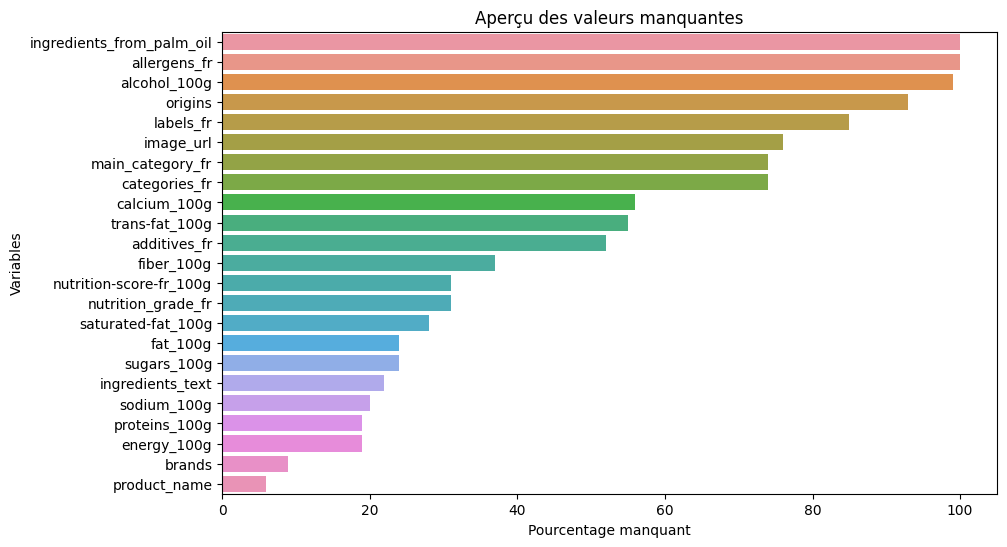

----------------------------------------------------------------------------------------------------
                                          Données manquantes :
----------------------------------------------------------------------------------------------------
                           Total manquant  Pourcentage manquant
ingredients_from_palm_oil          320772                 100.0
allergens_fr                       320753                 100.0
alcohol_100g                       316639                  99.0
origins                            298582                  93.0
labels_fr                          274106                  85.0
image_url                          244936                  76.0
main_category_fr                   236406                  74.0
categories_fr                      236361                  74.0
calcium_100g                       179722                  56.0
trans-fat_100g                     177474                  55.0
additives_fr                   

In [ ]:
visualize_missing_data(df)